In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading the raw data


In [15]:
raw_data=pd.read_csv('1.04. Real-life example.csv');
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [16]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [17]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [18]:
data=raw_data.drop(['Model'], axis=1)

In [19]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


False means value is 'present' , and true means value is 'not present'

In [20]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [21]:
data.isnull().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

The above code shows 172 price entries are null, and 150 Engine values are null.
if u are removing the less than 5% percent of data the u can remove all of the missing values of data.

In [22]:
data_no_mv=data.dropna(axis=0)

In [23]:






data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [24]:
data_no_mv.isnull().sum()


Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# Printing the probability distriution function for each feature, so that we observe some values like outliers,graph type.
we use the seaaborn method to probability distribution function

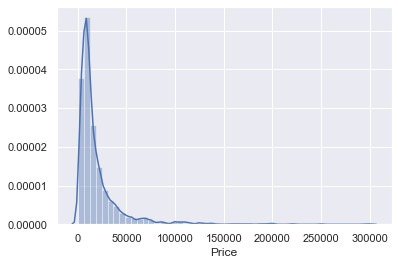

In [25]:
sns.distplot(data_no_mv['Price'])

# DataFrame.quantile(the quantile) returns the value at the given quantile(-np.percentile) pandas

In [26]:
q=data_no_mv['Price'].quantile(0.99)

In [27]:
q

129812.51999999981

In [28]:
data_1=data_no_mv[data_no_mv['Price']<q]

In [29]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [30]:
data_1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

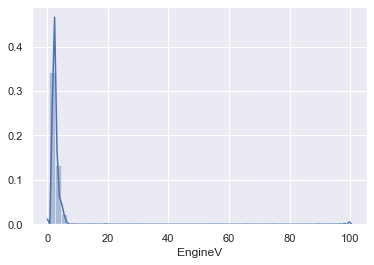

In [31]:
sns.distplot(data_1['EngineV'])

In [32]:
r=data_1['EngineV'].quantile(0.99)

In [33]:
r

6.0

In [34]:
data_2=data_1[data_1['EngineV']<r]

In [35]:
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3934,3934.000000,3934,3934.000000,3934.000000,3934,3934,3934.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1500,NaN,NaN,1845,3569,NaN
mean,NaN,17726.931866,NaN,165.275547,2.417145,NaN,NaN,2006.298678
std,NaN,18886.853007,NaN,102.982166,0.895642,NaN,NaN,6.688828
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6992.250000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [36]:
data_2.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

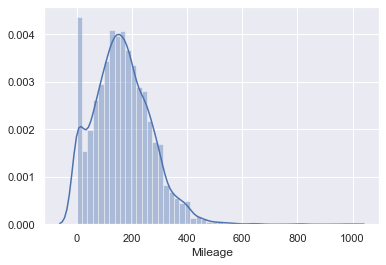

In [37]:
sns.distplot(data_2['Mileage'])

In [38]:
g=data_2['Mileage'].quantile(0.99)

In [39]:
data_3=data_2[data['Mileage']<g]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [40]:
data_3.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [41]:
data_3.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

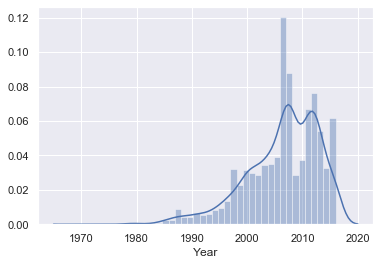

In [42]:
sns.distplot(data_3['Year'])

In [43]:
c=data_3['Year'].quantile(0.1)
data_4=data_3[data_3['Year']>c]

In [44]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3433,3433.000000,3433,3433.000000,3433.000000,3433,3433,3433.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1192,NaN,NaN,1697,3144,NaN
mean,NaN,19622.669345,NaN,148.217303,2.435963,NaN,NaN,2008.148849
std,NaN,19425.538866,NaN,86.800994,0.920217,NaN,NaN,4.585656
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,86.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12800.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23200.000000,NaN,206.000000,3.000000,NaN,NaN,2012.000000


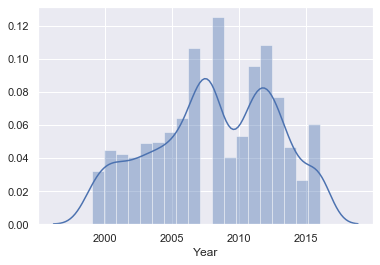

In [45]:
sns.distplot(data_4['Year'])

In [47]:
data_4.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [48]:
data_cleaned=data_4.reset_index(drop=True)

In [49]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3433,3433.000000,3433,3433.000000,3433.000000,3433,3433,3433.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1192,NaN,NaN,1697,3144,NaN
mean,NaN,19622.669345,NaN,148.217303,2.435963,NaN,NaN,2008.148849
std,NaN,19425.538866,NaN,86.800994,0.920217,NaN,NaN,4.585656
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,86.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12800.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23200.000000,NaN,206.000000,3.000000,NaN,NaN,2012.000000


In [50]:
data_cleaned.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# From now we will be checking some of the ols assumptions

Text(0.5, 1.0, 'Price and Mileage')

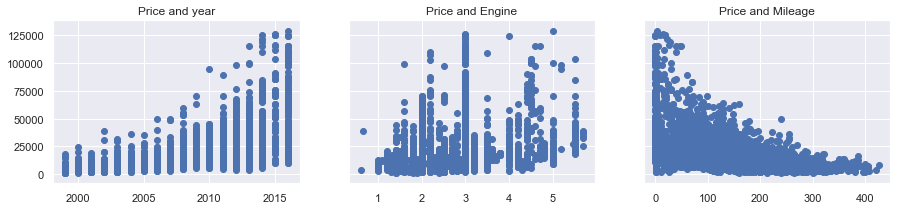

In [51]:
f, (axis1,axis2,axis3)= plt.subplots(1,3, sharey=True, figsize=(15,3))
axis1.scatter(data_cleaned['Year'],data_cleaned['Price'])
axis1.set_title('Price and year')
axis2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
axis2.set_title('Price and Engine')
axis3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
axis3.set_title('Price and Mileage')

In [52]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price 
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3428,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3429,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3430,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3431,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [137]:
data_cleaned=data_cleaned.drop('Price', axis=1)

Text(0.5, 1.0, 'Price and Mileage')

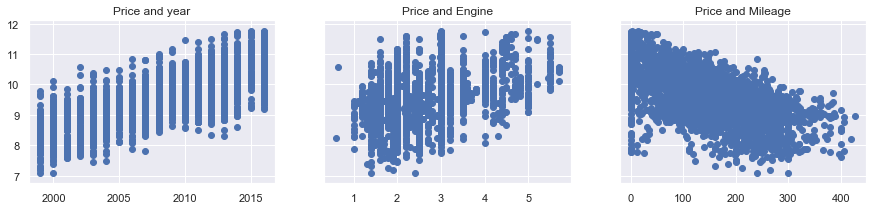

In [138]:
f, (axis1,axis2,axis3)= plt.subplots(1,3, sharey=True, figsize=(15,3))
axis1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
axis1.set_title('Price and year')
axis2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
axis2.set_title('Price and Engine')
axis3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
axis3.set_title('Price and Mileage')

# we no longer need price feature ,we added ''log_price" feature in it relacing price feature so when we plot the graph we get the correct result

Text(0.5, 1.0, 'Price and Mileage')

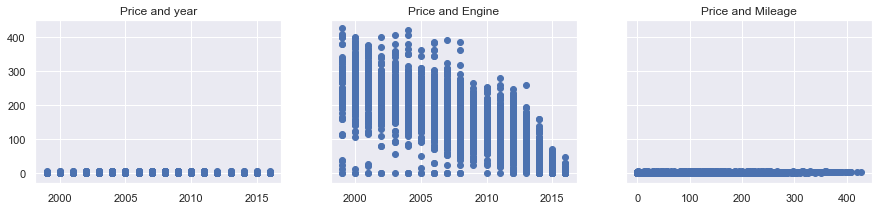

In [139]:
f, (axis1,axis2,axis3)= plt.subplots(1,3, sharey=True, figsize=(15,3))
axis1.scatter(data_cleaned['Year'],data_cleaned['EngineV'])
axis1.set_title('Price and year')
axis2.scatter(data_cleaned['Year'],data_cleaned['Mileage'])
axis2.set_title('Price and Engine')
axis3.scatter(data_cleaned['Mileage'],data_cleaned['EngineV'])
axis3.set_title('Price and Mileage')

# for the above plot, we have linear model 

# NO autocorelation loically all the variable independet of each other as the price is predicted on the about features

# Now check for MultiCollinearity

sk learn does not have dedicate method to check for the collinearity. We can use the stasModel for checking the collinearity. one of the best method to check for the collinearity is to use VIF(Variance Inflation Factor). VIH estiates how much larger the square root of the standard error an estimate is to comapre it to the situation where the variable are completely uncorelated with each other. 

# we use VIH on continuous variable only

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year','EngineV']]
vif = pd.DataFrame()
       

In [141]:
variables.shape

(3433, 3)

In [142]:
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(3)]

        

In [143]:
vif['Features']= variables.columns

In [144]:
vif

,VIF,Features
0,3.898858,Mileage
1,10.583357,Year
2,8.010969,EngineV


# vif between 1 and 5 is ok. In this let us remove year because it is too corelated with other variable 

In [145]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

# Creating the dummies variables

In [146]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [147]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year','EngineV']]
vif = pd.DataFrame()

In [149]:
variables.shape

(3433, 3)

In [150]:
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(3)]

       

In [151]:
vif['Features']= variables.columns

In [152]:
vif

,VIF,Features
0,3.898858,Mileage
1,10.583357,Year
2,8.010969,EngineV


In [153]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [154]:
cols=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [156]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Linear Regression Model

In [157]:
targets=data_preprocessed['log_price']
features=data_preprocessed.drop('log_price',axis=1)

# scale the data

In [158]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [159]:
inputs_scaled=scaler.transform(features)

# Train and Test

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size=0.2, random_state=365)

# Create the Regression

In [161]:
reg= LinearRegression()
reg.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
y_hat= reg.predict(x_train)

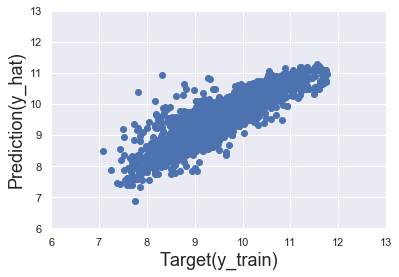

In [163]:
plt.scatter(y_train,y_hat)
plt.xlabel('Target(y_train)',size=18)
plt.ylabel('Prediction(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

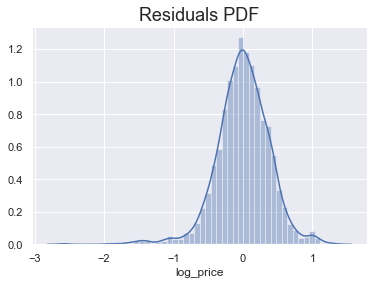

In [164]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [165]:
reg.score(x_train, y_train)

0.7728435033389197

# finding weights ands bias

In [166]:
reg.coef_

array([-0.41080677,  0.20615279,  0.02126326,  0.0113972 , -0.15480615,
       -0.19826263, -0.08096893, -0.09588746, -0.12367831, -0.08949942,
       -0.14978255, -0.1127426 , -0.16551788, -0.09691443, -0.02974274,
       -0.13989604,  0.30662316])

In [167]:
reg.intercept_

9.537648111691675

In [168]:
reg_summary= pd.DataFrame(features.columns.values,columns=['Features'])

In [169]:
reg_summary['weights']=reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.410807
1,EngineV,0.206153
2,Brand_BMW,0.021263
3,Brand_Mercedes-Benz,0.011397
4,Brand_Mitsubishi,-0.154806
5,Brand_Renault,-0.198263
6,Brand_Toyota,-0.080969
7,Brand_Volkswagen,-0.095887
8,Body_hatch,-0.123678
9,Body_other,-0.089499


In [171]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

# Testing

In [172]:
y_hat_test=reg.predict(x_test)

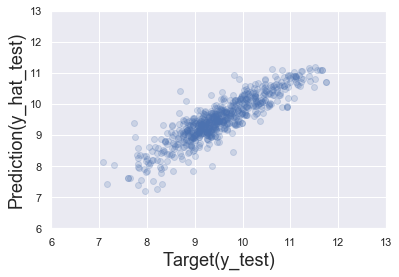

In [176]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Target(y_test)',size=18)
plt.ylabel('Prediction(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [178]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,52029.292388
1,11806.998753
2,5413.550965
3,8097.670364
4,6432.599972


In [179]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,52029.292388,NaN
1,11806.998753,NaN
2,5413.550965,NaN
3,8097.670364,NaN
4,6432.599972,NaN
...,...,...
682,14544.293609,28700.0
683,28290.662111,NaN
684,2868.036898,NaN
685,19846.848417,NaN


In [180]:
y_test

2220    11.127263
817      9.332558
913      8.160518
2467     9.104980
19       8.779557
          ...    
2935     9.392662
2528    10.134599
2431     7.824046
1973     9.846917
1174     9.464983
Name: log_price, Length: 687, dtype: float64

In [181]:
y_test=y_test.reset_index(drop=True )
y_test.head

<bound method NDFrame.head of 0      11.127263
1       9.332558
2       8.160518
3       9.104980
4       8.779557
         ...    
682     9.392662
683    10.134599
684     7.824046
685     9.846917
686     9.464983
Name: log_price, Length: 687, dtype: float64>

In [182]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,52029.292388,68000.0
1,11806.998753,11300.0
2,5413.550965,3500.0
3,8097.670364,9000.0
4,6432.599972,6500.0
...,...,...
682,14544.293609,12000.0
683,28290.662111,25200.0
684,2868.036898,2500.0
685,19846.848417,18900.0


In [183]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']

In [189]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residuals,Difference,Difference%
0,52029.292388,68000.0,15970.707612,23.486335,23.486335
1,11806.998753,11300.0,-506.998753,4.486715,4.486715
2,5413.550965,3500.0,-1913.550965,54.672885,54.672885
3,8097.670364,9000.0,902.329636,10.025885,10.025885
4,6432.599972,6500.0,67.400028,1.036924,1.036924
...,...,...,...,...,...
682,14544.293609,12000.0,-2544.293609,21.202447,21.202447
683,28290.662111,25200.0,-3090.662111,12.264532,12.264532
684,2868.036898,2500.0,-368.036898,14.721476,14.721476
685,19846.848417,18900.0,-946.848417,5.009780,5.009780


In [191]:
df_pf.describe()

,Prediction,Target,Residuals,Difference,Difference%
count,687.000000,687.000000,687.000000,687.000000,687.000000
mean,17251.686190,19159.315255,1907.629064,29.365903,29.365903
std,13191.136154,18912.516036,9920.008797,35.396119,35.396119
min,1316.806853,1200.000000,-37099.673155,0.049435,0.049435
25%,8747.586015,8200.000000,-2308.038105,9.927676,9.927676
50%,12785.289191,12500.000000,159.476534,22.573441,22.573441
75%,21406.460234,22500.000000,3398.244158,36.984682,36.984682
max,71446.350666,125000.000000,80484.773932,460.722018,460.722018


In [193]:
pd.options.display.max_rows =999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%']) 

,Prediction,Target,Residuals,Difference,Difference%
14,8904.40,8900.00,-4.40,0.05,0.05
646,2000.13,1999.00,-1.13,0.06,0.06
536,12232.69,12200.00,-32.69,0.27,0.27
343,7616.33,7650.00,33.67,0.44,0.44
652,10950.83,11000.00,49.17,0.45,0.45
44,28369.69,28500.00,130.31,0.46,0.46
124,8854.26,8899.00,44.74,0.50,0.50
635,9743.71,9800.00,56.29,0.57,0.57
655,9965.38,9900.00,-65.38,0.66,0.66
98,6343.23,6300.00,-43.23,0.69,0.69
